In [11]:
from matplotlib import pyplot as plt
import scipy as scp
import scipy.fft
import numpy as np
from numpy import cos, sin, pi,  arange

#from scipy.signal import kaiserord, lfilter, firwin, freqz, convolve,filtfilt

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)
            

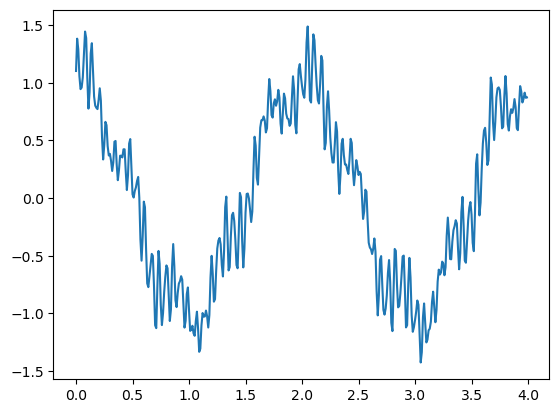

In [15]:
plt.plot(t,x,)

  - split the complex fourier result into *angle* and *magnitude* 

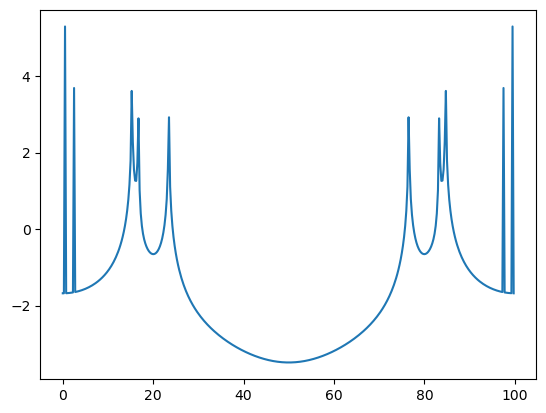

In [20]:

T = 4
#dF = 1/T = 0.25Hz
fs = 100
#nyquist-frequency = fs/2

f = np.linspace(0,fs-1/T,fs*T)
plt.plot(f,np.log(np.abs(scp.fft.fft(x))))
#plt.plot(f[0:len(f)//2+1],(np.abs(scp.fft.rfft(x))))

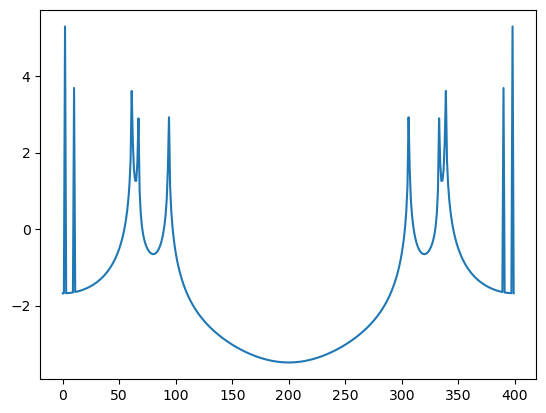

In [21]:
plt.plot(np.log(np.abs(np.fft.fft(x))))

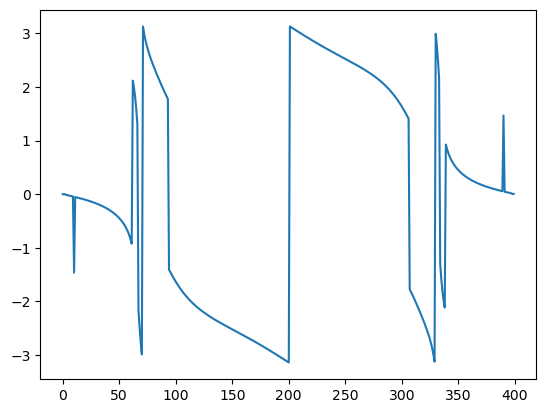

In [22]:
plt.plot(np.angle(scp.fft.fft(x)))

- set the respective magnitudes to zero (we start with a lowpass filter: `magnitude[30:370] = 0`)


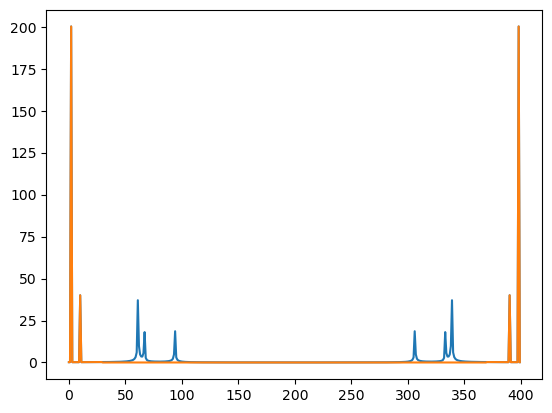

In [25]:
ang = np.angle(scp.fft.fft(x))
mag = np.abs(scp.fft.fft(x))
plt.plot((mag))
mag[30:370] = 0.
plt.plot((mag))

- combine angle and magnitude back to a complex fourier coefficient ($m*e^(1j*ang)$)
- apply the inverse FFT
- plot the signal with what you started out


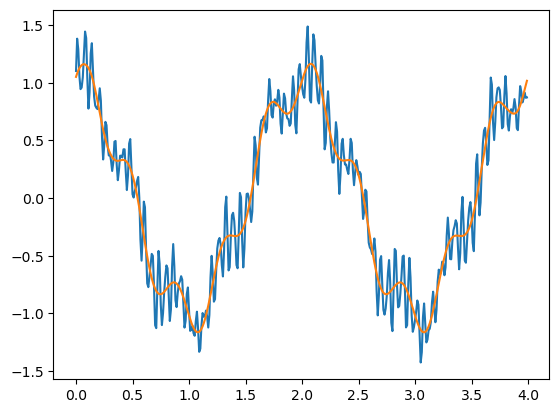

In [26]:
plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)


## Highpass instead of lowpass

Repeat the steps from above, but this time, remove the low frequency components


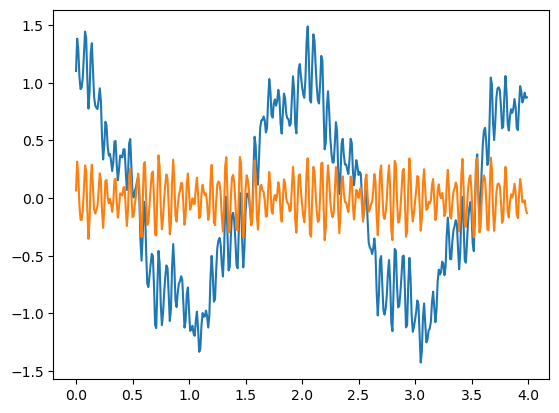

In [27]:
ang = np.angle(scp.fft.fft(x))
mag = np.abs(scp.fft.fft(x))


mag[1:30] = 0.1
mag[370:400] = 0.1



plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)

#ang_random = np.random.rand(ang.shape[0])*2*np.pi - np.pi
#plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang_random)).real)



## What happens to the frequency and time response if we add "artefacts"?
 Add a DC-offset (a step-function) starting from `x[200:]` and investigate the fourier space. Filter it again (low or high pass) and transfer it back to the time domain and investigate the signal around the spike.

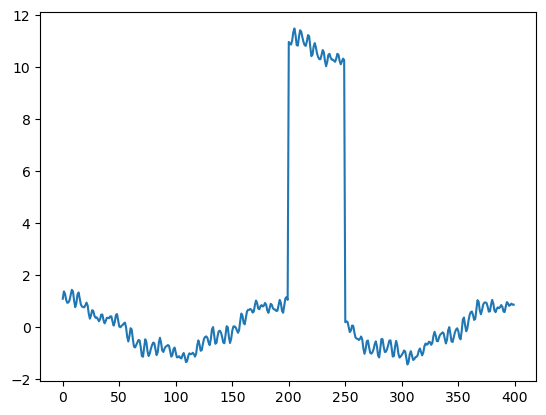

In [30]:
xtmp = x.copy()
xtmp[200:250] = xtmp[200:250]+10

plt.plot(xtmp)

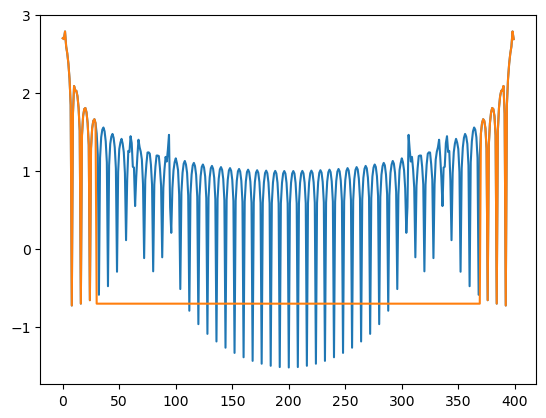

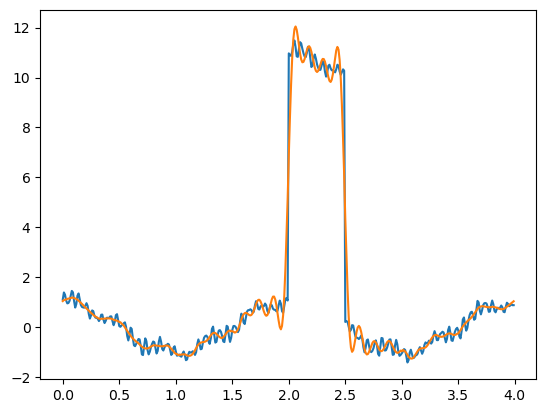

In [31]:

ang = np.angle(scp.fft.fft(xtmp))
mag = np.abs(scp.fft.fft(xtmp))
plt.plot(np.log10(mag))
mag[30:370] = 0.2
plt.plot(np.log10(mag))
plt.show()
plt.plot(t,xtmp)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)


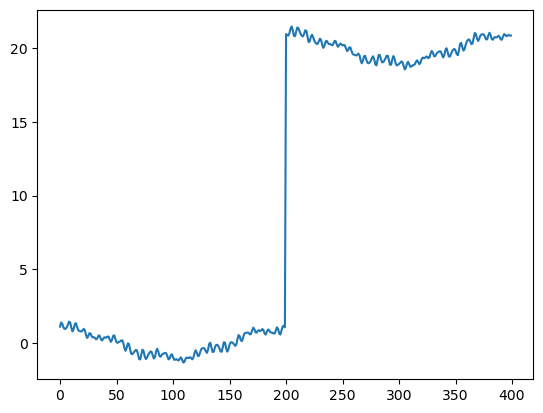

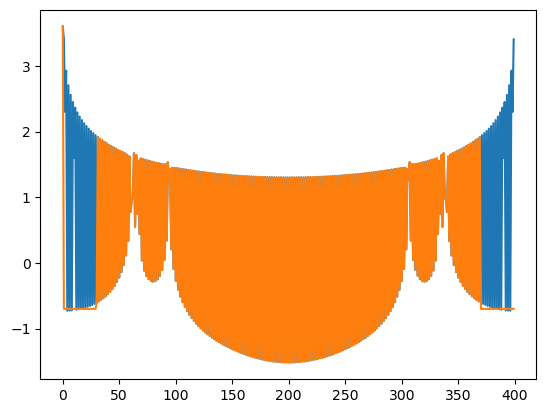

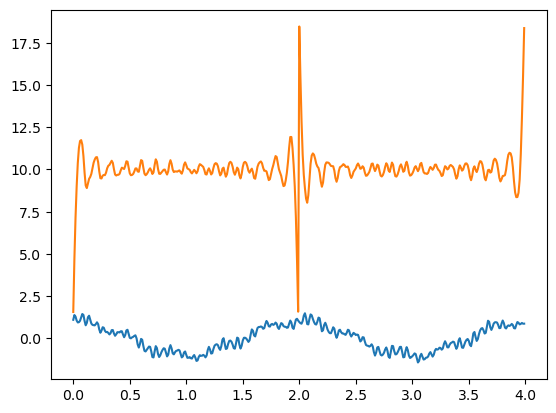

In [32]:
xtmp = x.copy()
xtmp[200:] = xtmp[200:]+20
plt.plot(xtmp)

plt.figure()
ang = np.angle(scp.fft.fft(xtmp))
mag = np.abs(scp.fft.fft(xtmp))
plt.plot(np.log10(mag))
mag[1:30] = 0.2
mag[370:400] = 0.2
plt.plot(np.log10(mag))
plt.show()

plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)

 ## Impulse Response Function
 To get a bit deeper understanding of what is going on, have a look at the fourier transform of a new impulse signal (e.g. 1:400 => 0. and 200 => 1.). What do you observe?
 Why would we see ringing if we put most of the coefficients to 0?

In [ ]:
# Impulse Response Function
x[:] =0
x[200] = 1
plt.plot(x)

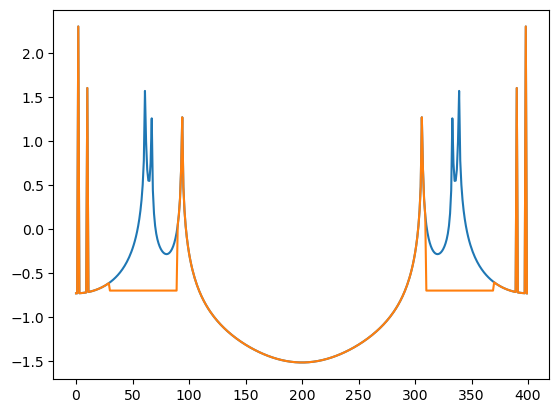

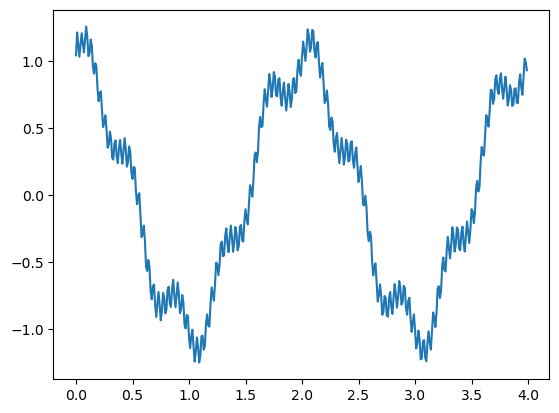

In [36]:

ang = np.angle(scp.fft.fft(x))
mag = np.abs(scp.fft.fft(x))
plt.plot(np.log10(mag))
mag[310:370] = 0.2
mag[30:90] = 0.2
plt.plot(np.log10(mag))
plt.show()
#plt.plot(t,x)
plt.plot(t,scp.fft.ifft(mag*np.exp(1j*ang)).real)


 ## Filtering EEG data


In [37]:
import sys
sys.path.insert(0,"..")
from mne_bids import (BIDSPath,read_raw_bids)
import mne_bids
import importlib
import ccs_eeg_utils

bids_root = "../local/bids"
bids_root = "/bigpool/export/users/ehinger/erp-core/bids" # Bene's Server location
bids_root = "/store/data/erp-core/"

subject_id = '030'


bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)
raw = read_raw_bids(bids_path)
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()

Reading /store/data/erp-core/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_eeg.fdt


/tmp/ipykernel_2213339/3616083917.py:18: RuntimeWarning: Data file name in EEG.data (sub-030_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-030_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)


Reading events from /store/data/erp-core/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Re

<RawEEGLAB | sub-030_ses-P3_task-P3_eeg.fdt, 33 x 393216 (384.0 s), ~99.0 MB, data loaded>

**T:** Choose the channel "Pz", plot the channel (same as previous HW)

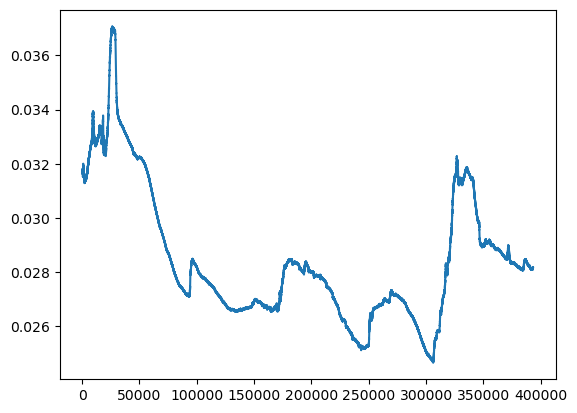

In [38]:
#%matplotlib qt
raw.pick(["Pz"])#["Pz","Fz","Cz"])
plt.plot(raw[:,:][0].T)

**T:** Plot the fourier space using `raw.plot_psd`


Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_2213339/794039717.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
/home/ehinger/micromamba/envs/course_EEG_ws2023/lib/python3.10/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


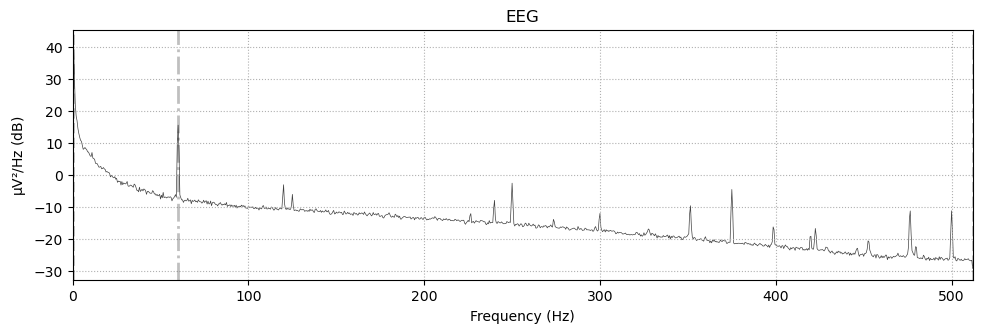

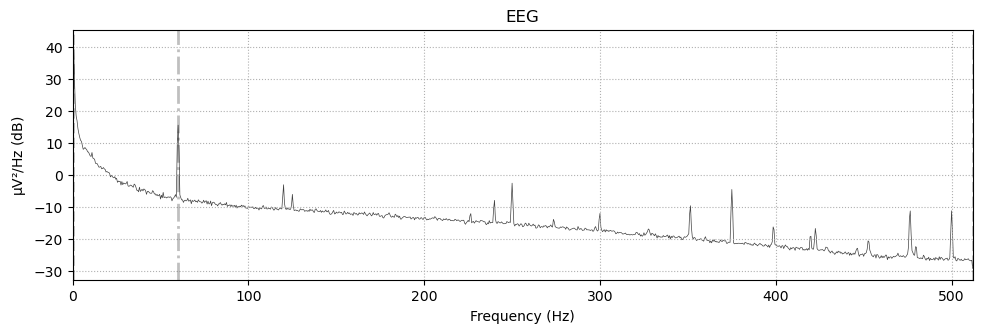

In [44]:
%matplotlib inline
#raw.plot_psd(area_mode='range', tmax=10.0, average=False,xscale="linear",);

raw.compute_psd().plot()



**T:** Now we filter using `raw.filter()`, specify a highpass of 0.5Hz and a lowpass of 50Hz. Plot the fourier spectrum again.

**T:** Plot the channel again, did the filter work as indented?


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6759 samples (6.601 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_2213339/192806494.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_f.plot_psd(area_mode='range', tmax=10.0, average=False);
/home/ehinger/micromamba/envs/course_EEG_ws2023/lib/python3.10/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


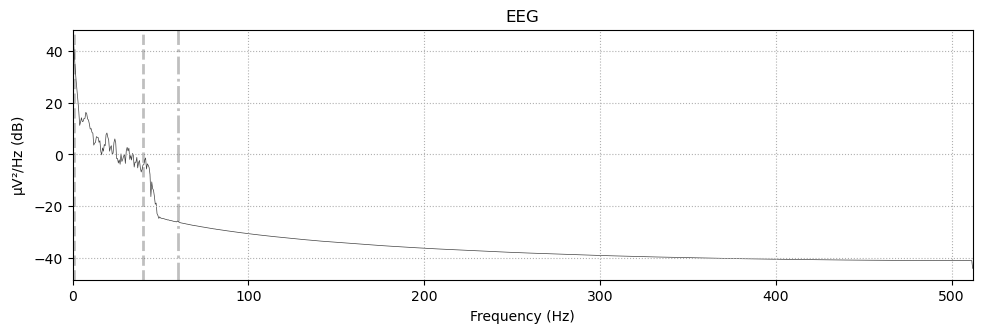

In [49]:
raw_f = raw.copy().filter(0.5,40, fir_design='firwin')
raw_f.plot_psd(area_mode='range', tmax=10.0, average=False);

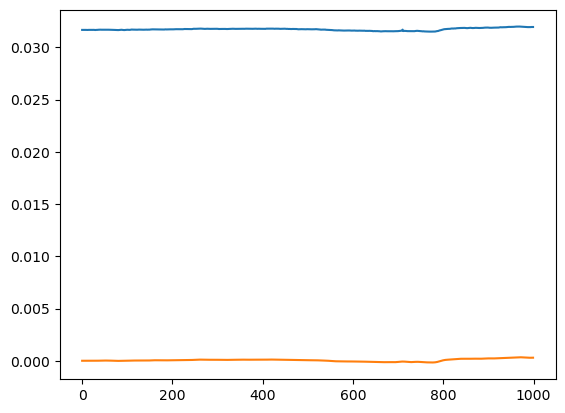

In [50]:
plt.plot(raw[:,0:1000][0].T)
plt.plot(raw_f[:,0:1000][0].T)

Due to a huge DC-offset, the signals cannot be compared. We have to remove e.g. the median from each signal

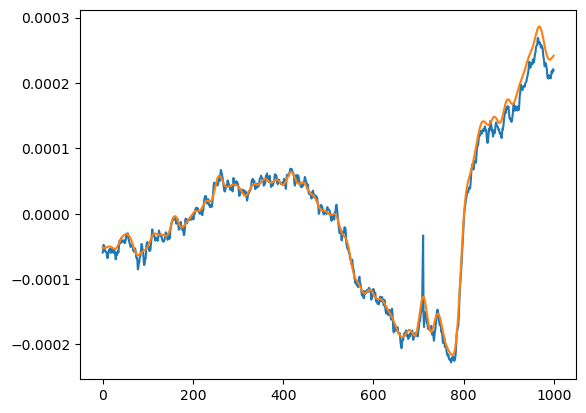

In [52]:
plt.plot(raw[:,0:1000][0].T-np.median(raw[:,0:1000][0].T))
plt.plot(raw_f[:,0:1000][0].T-np.median(raw_f[:,0:1000][0].T))
#plt.plot(raw_f[:,0:1000][0].T-np.mean(raw_f[:,0:1000][0].T))